In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

In [4]:
np.random.seed(200)
k = 3
centroids= {
    i+1:[np.random.randint(0,80),np.random.randint(0,80)] ## randomly choosing centroids
    for i in range(k)
}

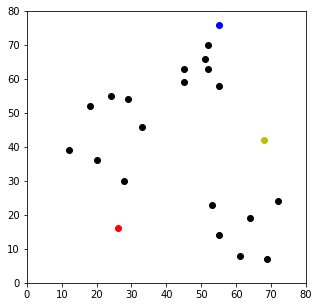

In [7]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap = {1:'r' , 2:'y',3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i] , color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

### Assignment stage

In [23]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_form_{}'.format(i)] = (
        np.sqrt(
            (df['x']=centroids[i][0]) ** 2 
            + (df['y']= centroids[i][1]) ** 2
         )
        )
    centroid_distance_cols = ['distance_form_{}'.format(i) for i in centroids.keys()]
    df['closet'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closet'] = df['closet'].map(lambda x:int(x.lstrip('distance_form_')))
    df['color'] = df['closet'].map(lambda x: colmap[x])
    return df

SyntaxError: invalid syntax (Temp/ipykernel_12140/3007537604.py, line 5)

## using sklearn

In [24]:
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

In [25]:
from sklearn.cluster import KMeans


In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [28]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

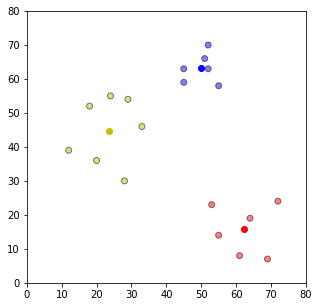

In [34]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1] , labels)
colors1 = list(colors)
plt.scatter(df['x'],df['y'],color=colors1,alpha = 0.5,
            edgecolor='k')
for idx,centroid in enumerate(centroids):
    plt.scatter(*centroid,color=colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()